<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Durg_recomending_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt



In [33]:
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/drug200.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.shape

(200, 6)

In [34]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
172,39,0,2,1,17.225,drugY
51,67,1,2,1,10.898,drugX
107,42,1,1,0,20.013,drugY
18,23,1,1,0,7.298,drugC
32,49,1,1,1,11.014,drugX
52,62,1,1,1,27.183,drugY
30,18,0,2,1,8.750,drugX
24,33,0,1,0,33.486,drugY
169,20,0,0,0,11.262,drugA
160,30,0,2,0,10.443,drugX


In [35]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = "coolwarm")

ValueError: could not convert string to float: 'drugY'

In [36]:
X = df.drop('Drug', axis = 1).values
y = df['Drug'].values

In [13]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=20)


In [39]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_predict = tree_model.predict(X_test)

In [41]:
print(classification_report( y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print("Decision tree accuracy:",accuracy_score(y_predict, y_test))

Decision tree accuracy: 0.95


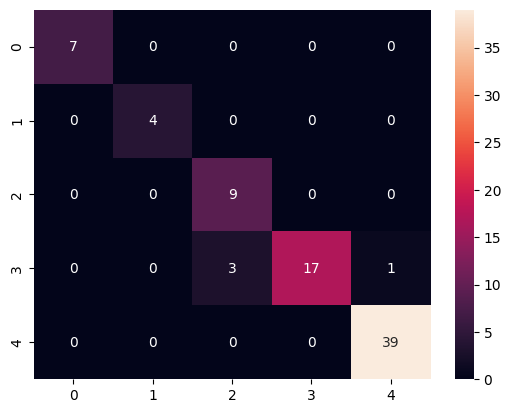

In [44]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

Cross_val_prediction

In [45]:
predict = cross_val_predict(X=X, y=y, estimator = tree_model, cv = 5)
print("Classificaation Report:",classification_report(y, predict))

Classificaation Report:               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



Decision Tree


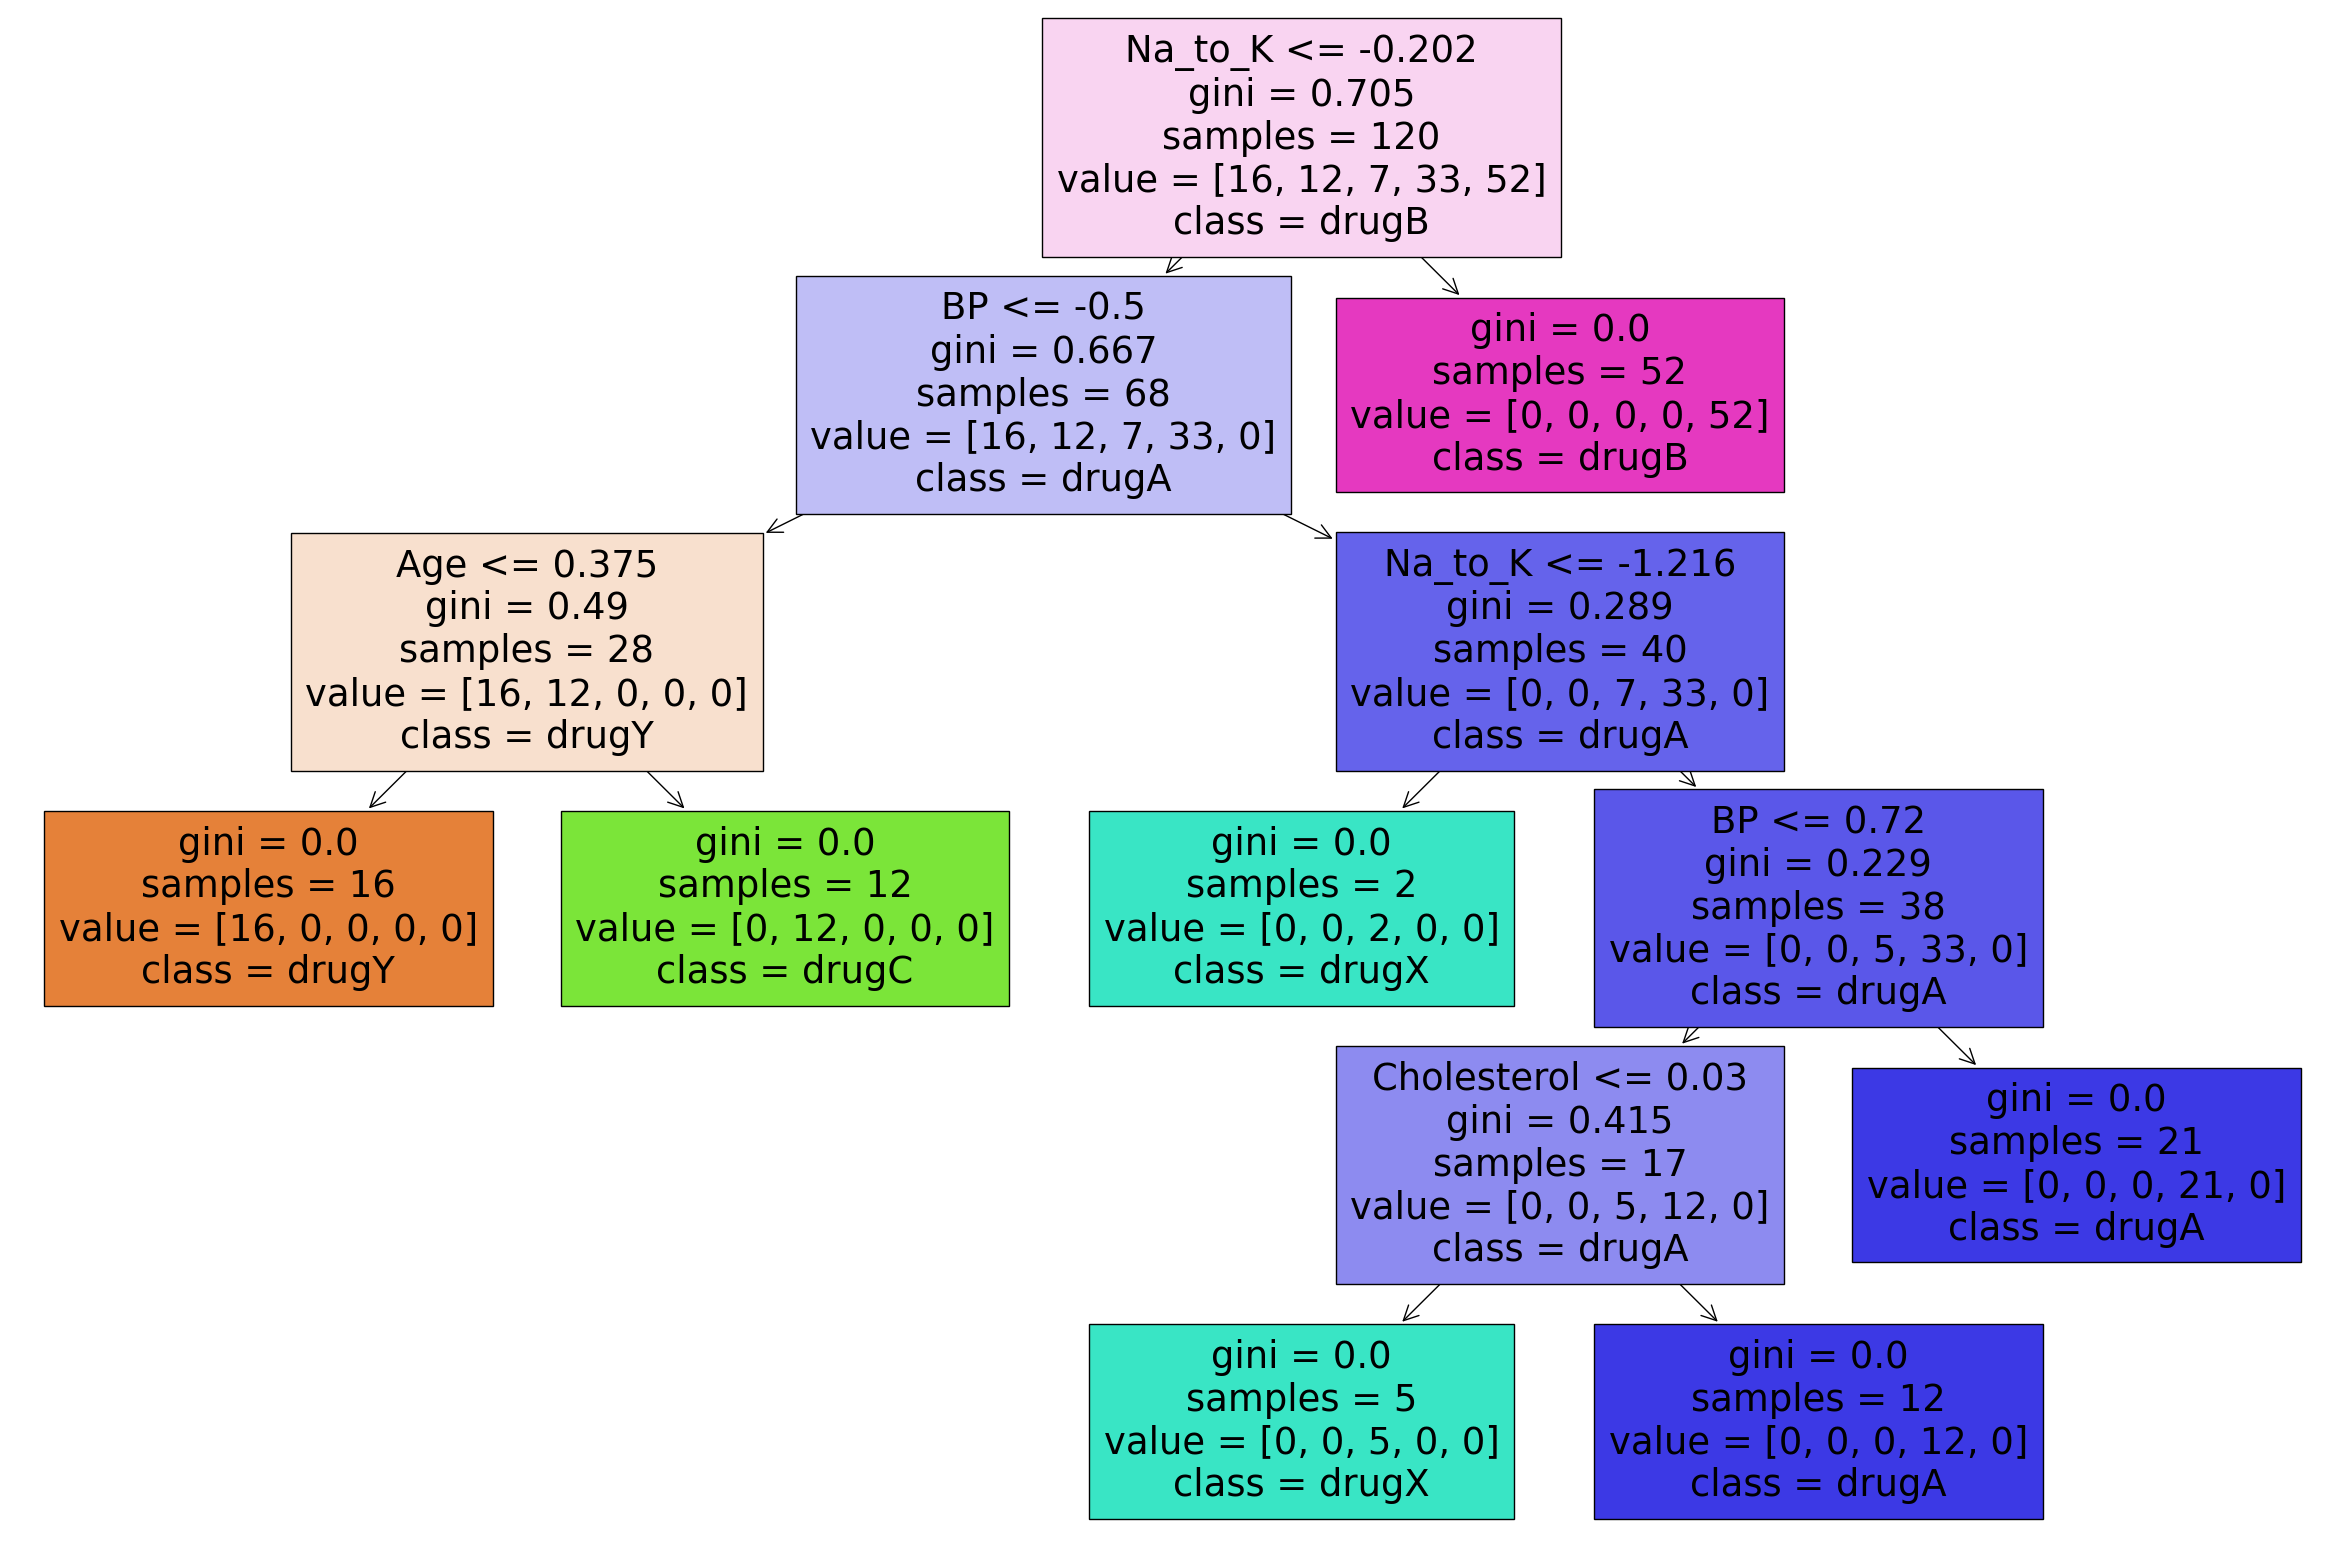

In [46]:
cols = df.drop('Drug', axis = 1).columns
classes = df['Drug'].unique()

plt.figure(figsize = (30,20))
tree.plot_tree(tree_model,feature_names=cols, class_names=classes, filled = True)
plt.show()